---
title: "Security Incidents in Palestine: Trends and Patterns (2002-2025)"
format:
  html:
    toc: true
    toc-depth: 3
    code-fold: true
    number-sections: true
    theme: cosmo
    fig-width: 9
    fig-height: 6
    fig-dpi: 300
    self-contained: true
execute:
  warning: false
  message: false
editor: visual
---

In [1]:
#| label: setup
#| include: false

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from matplotlib.colors import LinearSegmentedColormap
import warnings
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
from scipy import stats

# Configure plot settings
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")

# Set consistent color palette
palette = {"primary": "#FFBD59", "secondary": "#64C1FF", "danger": "#FF5252"}

# Load and prepare data
df = pd.read_csv("data/security_incidents_cleaned.csv")
country_data = df[df['country'] == 'Syrian Arab Republic']

# Executive Summary

# Background: The Conflict


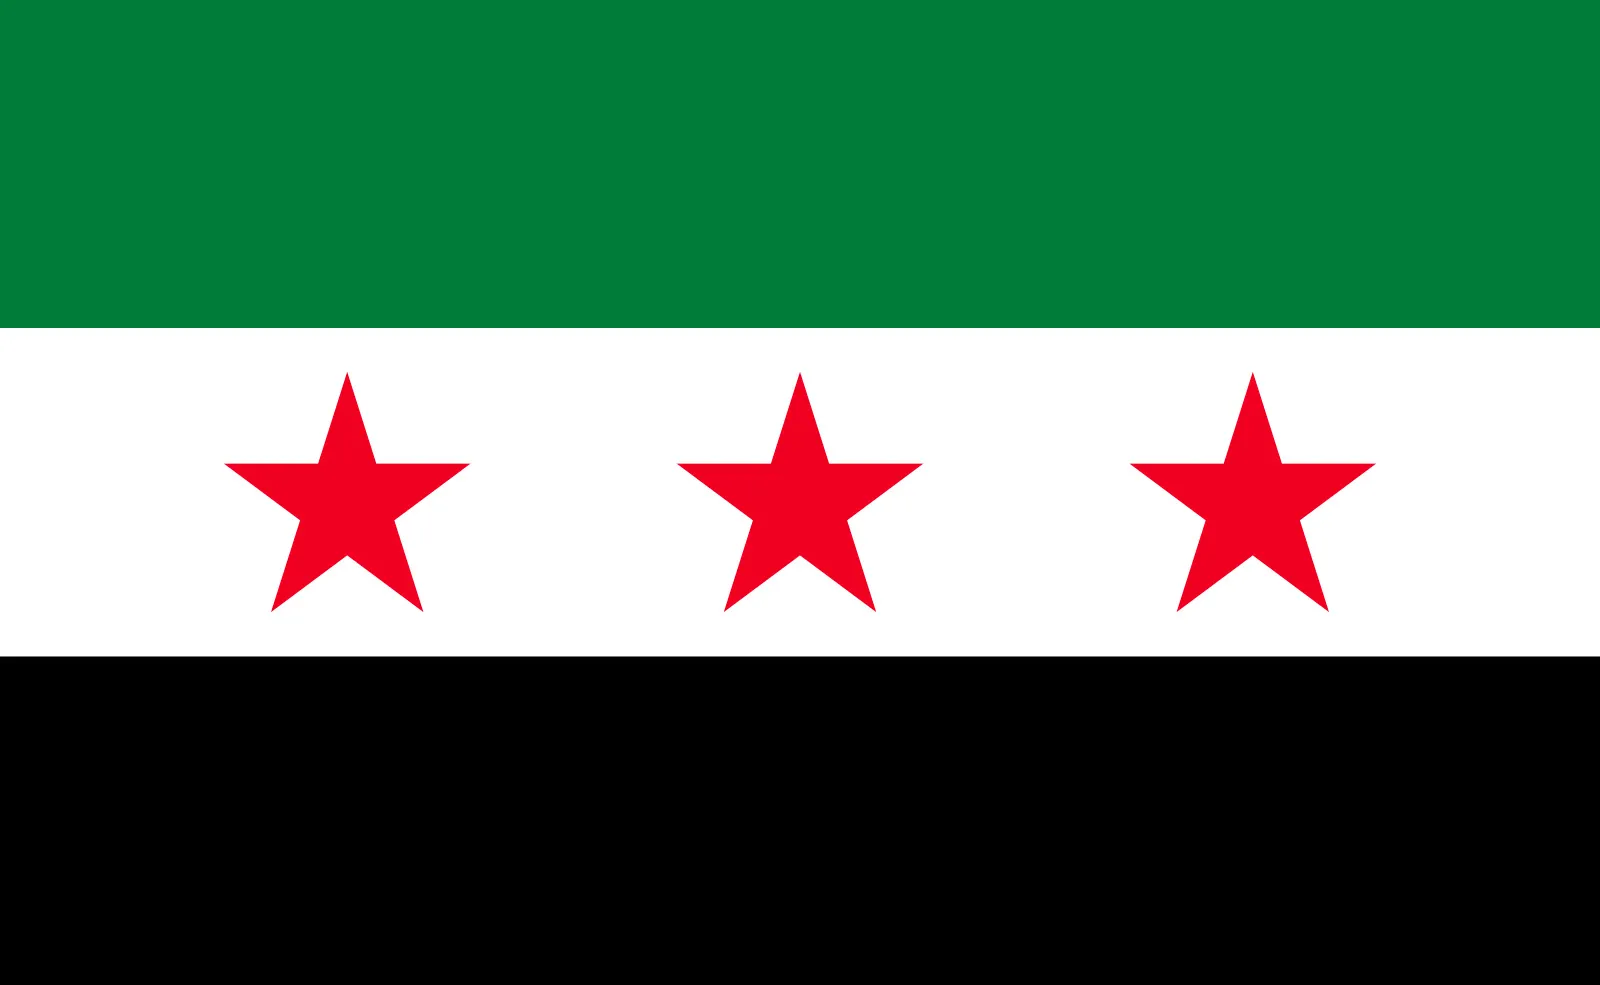

In [2]:
from IPython.display import Image
Image("images/syria.png", width=500)

## Historical Context

## Recent Escalation

# Temporal Trends in Security Incidents {#sec-temporal}

## Incident Frequency Over Time


In [3]:
#| label: fig-yearly-incidents
#| fig-cap: Security incidents in Palestine from 2002 to 2025
#| echo: false

# Group incidents by year
yearly_incidents = country_data.groupby('year').size().reset_index(name='incidents')

# Create line chart
fig = px.line(
    yearly_incidents, 
    x='year', 
    y='incidents',
    markers=True,
    labels={'incidents': 'Number of Incidents', 'year': 'Year'},
    height=500
)

# Configure layout
fig.update_layout(
    title=None,
    xaxis=dict(tickmode='linear', dtick=2),
    yaxis=dict(zeroline=True),
    hovermode='x unified',
    template='plotly_white'
)

# Add range slider
fig.update_xaxes(rangeslider_visible=True)

# Add event annotations
events = [
    {'year': 2006, 'event': 'Hamas takes control of Gaza', 'y_position': 5},
    {'year': 2014, 'event': 'Israel-Hamas conflict', 'y_position': 10},
    {'year': 2018, 'event': 'Gaza border protests', 'y_position': 8},
    {'year': 2021, 'event': '11-day conflict', 'y_position': 7},
    {'year': 2023, 'event': 'Oct 7 Hamas attack', 'y_position': 15},
    {'year': 2024, 'event': 'Gaza war escalation', 'y_position': 65}
]

for event in events:
    fig.add_annotation(
        x=event['year'],
        y=event['y_position'],
        text=event['event'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-20,
        font=dict(size=10),
        bgcolor="rgba(255,255,255,0.85)",
        bordercolor="black",
        borderwidth=1,
        borderpad=3
    )

fig.show()

### Analysis of Incident Trends

## Effected Indivudals Over Time


In [4]:
#| label: fig-yearly-affected
#| fig-cap: Total affected individuals in Palestine from 2002 to 2025
#| echo: false

# Group by year and sum total_affected
yearly_affected = (
    country_data.groupby('year')['total_affected']
    .sum()
    .reset_index()
    .rename(columns={'total_affected': 'affected'})
)

# Create line chart
fig = px.line(
    yearly_affected, 
    x='year', 
    y='affected',
    markers=True,
    labels={'affected': 'Total Affected Individuals', 'year': 'Year'},
    height=500
)

# Configure layout
fig.update_layout(
    title=None,
    xaxis=dict(tickmode='linear', dtick=2),
    yaxis=dict(zeroline=True),
    hovermode='x unified',
    template='plotly_white'
)

# Add range slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

### Analysis of Humans Impacted

# Nature of Security Incidents {#sec-nature}

## Predominant Attack Types


In [5]:
#| label: fig-attack-types
#| fig-cap: Most common types of attacks in Palestine
#| echo: false

# Analyzing means of attack
attack_counts = country_data['means_of_attack'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']
attack_counts = attack_counts.sort_values('Count', ascending=False).head(10)

# Create horizontal bar chart with uniform color
fig_attacks = px.bar(
    attack_counts,
    y='Attack Type',
    x='Count',
    title=None,
    height=500,
    orientation='h'
)

# Set all bars to primary color
fig_attacks.update_traces(marker_color=palette["primary"])

# Configure layout
fig_attacks.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title="Number of Incidents",
    yaxis_title=None
)

fig_attacks.show()

### Analysis of Attack Methods

## Attack Contexts

### Analysis of Attack Contexts

# Human Impact of Security Incidents {#sec-impact}

## Casualties by Category


In [6]:
#| label: fig-casualties
#| fig-cap: Total casualties in Palestine by category
#| echo: false

# Create data for stacked bar chart
stacked_data = {
    'Category': ['Nationals', 'Internationals'],
    'Killed': [
        country_data['nationals_killed'].sum(),
        country_data['internationals_killed'].sum()
    ],
    'Wounded': [
        country_data['nationals_wounded'].sum(),
        country_data['internationals_wounded'].sum()
    ],
    'Kidnapped': [
        country_data['nationals_kidnapped'].sum(),
        country_data['internationals_kidnapped'].sum()
    ]
}

# Convert to DataFrame and reshape for stacking
stacked_df = pd.DataFrame(stacked_data)
stacked_df_long = pd.melt(
    stacked_df,
    id_vars=['Category'],
    value_vars=['Killed', 'Wounded', 'Kidnapped'],
    var_name='Status',
    value_name='Count'
)

# Create a stacked bar chart
fig_stacked = px.bar(
    stacked_df_long,
    x='Category',
    y='Count',
    color='Status',
    title=None,
    barmode='stack',
    height=500,
    color_discrete_map={
        'Killed': palette["danger"], 
        'Wounded': palette["primary"], 
        'Kidnapped': palette["secondary"]
    }
)

# Improve layout
fig_stacked.update_layout(
    xaxis_title=None,
    yaxis_title="Number of People",
    legend_title_text=None
)

fig_stacked.show()

### Analysis of Casualty Patterns

## Gender Distribution of Affected Individuals


In [7]:
#| label: fig-gender
#| fig-cap: Gender distribution of affected individuals
#| echo: false

# Check if we have gender data
gender_cols = ['gender_male', 'gender_female']
if all(col in country_data.columns for col in gender_cols):
    # Sum up total counts by gender
    gender_totals = {
        'Gender': ['Male', 'Female'],
        'Count': [
            country_data['gender_male'].sum(),
            country_data['gender_female'].sum()
        ]
    }

    # Convert to DataFrame
    gender_df = pd.DataFrame(gender_totals)

    # Create simple bar chart
    fig_gender = px.bar(
        gender_df,
        x='Gender',
        y='Count',
        title=None,
        height=450
    )

    # Set primary color for bars
    fig_gender.update_traces(marker_color=palette["primary"])

    # Improve layout
    fig_gender.update_layout(
        xaxis_title=None,
        yaxis_title="Number of Individuals"
    )

    fig_gender.show()

### Analysis of Gender Patterns

# Organizations and Actors {#sec-organizations}

## Organizations Affected by Security Incidents


In [8]:
#| label: fig-organizations
#| fig-cap: Security incidents by organization type
#| echo: false

# Count incidents affecting different organization types
org_cols = ['un', 'ingo', 'icrc', 'nrcs_and_ifrc', 'nngo', 'other']

# Create a summary of total incidents by organization type
org_totals = country_data[org_cols].sum().reset_index()
org_totals.columns = ['Organization Type', 'Total Incidents']

# Better labels for organization types
org_labels = {
    'un': 'United Nations',
    'ingo': 'International NGO',
    'icrc': 'Int. Committee of Red Cross',
    'nrcs_and_ifrc': 'National Red Cross/Red Crescent',
    'nngo': 'National NGO',
    'other': 'Other Organizations'
}

# Map the short names to full names
org_totals['Organization'] = org_totals['Organization Type'].map(org_labels)

# Sort by total incidents
org_totals = org_totals.sort_values('Total Incidents', ascending=False)

# Create a horizontal bar chart
fig_orgs = px.bar(
    org_totals,
    y='Organization',
    x='Total Incidents',
    title=None,
    height=500,
    orientation='h'
)

# Set all bars to primary color
fig_orgs.update_traces(marker_color=palette["primary"])

# Improve layout
fig_orgs.update_layout(
    yaxis_title=None,
    xaxis_title="Number of Incidents",
    yaxis={'categoryorder': 'total ascending'}
)

fig_orgs.show()

### Analysis of Organizational Impact

## Comparison of Actor Types


In [9]:
#| label: fig-actors
#| fig-cap: Host State vs Foreign Actors in Security Incidents
#| echo: false

# Filter only for Host State and Foreign actors
relevant_actors = ['Host state', 'Foreign or coalition forces']
actor_data = country_data[country_data['actor_type'].isin(relevant_actors)]

# Check if we have data for these specific actors
if len(actor_data) > 0:
    actor_counts = actor_data['actor_type'].value_counts().reset_index()
    actor_counts.columns = ['Actor Type', 'Count']
    
    # Create a column chart
    fig_actors = px.bar(
        actor_counts,
        x='Actor Type',
        y='Count',
        title=None,
        height=450
    )
    
    # Set primary color for all bars
    fig_actors.update_traces(marker_color=palette["primary"])
    
    # Improve layout
    fig_actors.update_layout(
        xaxis_title=None,
        yaxis_title="Number of Incidents"
    )
    
    fig_actors.show()

### Analysis of Actor Responsibility

# Major Incidents {#sec-major}

## Top 5 Most Impactful Security Incidents


In [10]:
#| label: tbl-top-incidents
#| tbl-cap: Most impactful security incidents in Palestine (by total affected)
#| echo: false

if not country_data.empty and 'total_affected' in country_data.columns:
    top5_incidents = country_data.sort_values(by='total_affected', ascending=False).head(5)
    
    # Select and rename columns for display
    display_cols = ['year', 'location', 'total_affected', 'total_killed', 'total_wounded', 'attack_context', 'actor_type']
    column_names = {
        'year': 'Year', 
        'location': 'Location', 
        'total_affected': 'Total Affected',
        'total_killed': 'Killed', 
        'total_wounded': 'Wounded',
        'attack_context': 'Context',
        'actor_type': 'Actor Type'
    }
    
    display_df = top5_incidents[display_cols].rename(columns=column_names)
    display(display_df)

,Year,Location,Total Affected,Killed,Wounded,Context,Actor Type
1546,2013,Project site,11,0,11,Combat/Crossfire,Unknown
2020,2016,Project site,9,9,0,Combat/Crossfire,Foreign or coalition forces
2216,2017,Office/compound,9,9,0,Combat/Crossfire,Foreign or coalition forces
3234,2021,Project site,8,4,4,Combat/Crossfire,Unknown
1604,2013,Road,7,0,0,Ambush,Non-state armed group: Global


### Analysis of Major Incidents

# Conclusions and Recommendations {#sec-conclusions}

## Key Findings

## Recommendations

### For Security Planning

### For Humanitarian Organizations

### For Policy Development

### For Future Research